In [22]:
import torch

# Autograd
How we can calculate gradient? It is essential for model optimization, so this is a very important concept

In [3]:
x = torch.rand(3, requires_grad=True)
# now we can do operations like df/dx
x

tensor([0.8604, 0.9462, 0.1154], requires_grad=True)

When we do operations with a tensor, PyTorch create **computational graph** for us
![image.png]

In [4]:
y = x + 2
y

tensor([2.8604, 2.9462, 2.1154], grad_fn=<AddBackward0>)

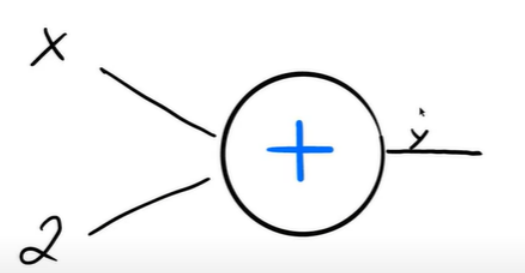
In **forward pass** (training loop) we calculate the output `y` and, *if we require gradient*, PyTorch automatically create and store a function, which used in **BackPropagation** algorithm to get the gradients
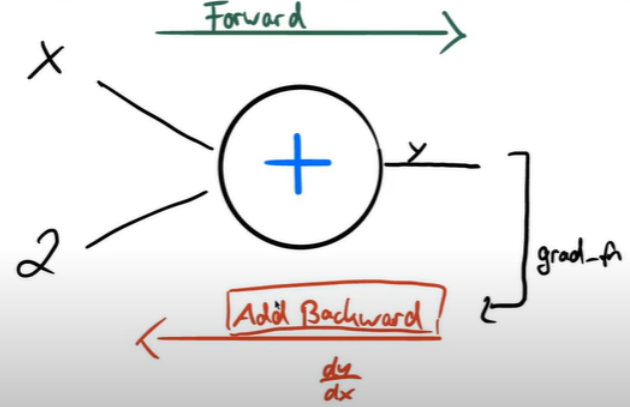

In [10]:
# division
d = x / 2
print(d)

# power
p = x ** 2
print(p)

tensor([0.4302, 0.4731, 0.0577], grad_fn=<DivBackward0>)
tensor([0.7404, 0.8952, 0.0133], grad_fn=<PowBackward0>)


To calculate the gradient we should use `backward` method. This method calculate **Jacobian** (if it calls from vector) or **gradient vector** (if it calls from scalar)
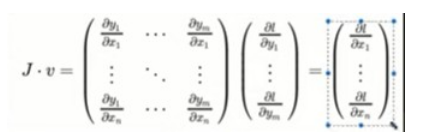

In [11]:
# multiply jacobian and vector
v = torch.tensor([1, 1, 1])
p.backward(v)
# result gradient will be stored in .grad attribute
print(x.grad)

tensor([5.1627, 5.6770, 0.6923])


**$\color{red}{!!!}$** Note that *whenever we call the `backward` method, then the gradient for tensor (of `x` in this case) will **accumalated** into grad attribute*

In [13]:
# w1*5 + w2*5 + w3*5 = output
# grad = [5, 5, 5]

weights = torch.ones(3)
weights.requires_grad_(True)

for epoch in range(3):
    output = (weights*5).sum() 
    output.backward()
    print(weights.grad)

tensor([5., 5., 5.])
tensor([10., 10., 10.])
tensor([15., 15., 15.])


We can zero our gradients

In [14]:
weights = torch.ones(3, requires_grad=True, dtype=torch.float32)
for epoch in range(3):
    output = (weights*5).sum()
    output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([5., 5., 5.])
tensor([5., 5., 5.])
tensor([5., 5., 5.])


Later we will work with **optimization package**

In [21]:
weights = torch.ones(3, requires_grad=True, dtype=torch.float32)
optimizer = torch.optim.Adagrad([weights], lr=0.1)

for epoch in range(5):
    output = (weights*5).sum()
    output.backward()
    optimizer.step()
    print(f'epoch №{epoch+1}|\n gradient: {weights.grad}\nweights: {weights} \n')
    optimizer.zero_grad()

epoch №1|
 gradient: tensor([5., 5., 5.])
weights: tensor([0.9000, 0.9000, 0.9000], requires_grad=True) 

epoch №2|
 gradient: tensor([5., 5., 5.])
weights: tensor([0.8293, 0.8293, 0.8293], requires_grad=True) 

epoch №3|
 gradient: tensor([5., 5., 5.])
weights: tensor([0.7716, 0.7716, 0.7716], requires_grad=True) 

epoch №4|
 gradient: tensor([5., 5., 5.])
weights: tensor([0.7216, 0.7216, 0.7216], requires_grad=True) 

epoch №5|
 gradient: tensor([5., 5., 5.])
weights: tensor([0.6768, 0.6768, 0.6768], requires_grad=True) 



In [26]:
w = torch.rand(3, requires_grad = True)
w

tensor([0.8260, 0.1855, 0.2357], requires_grad=True)

Also if we want to prevent tracking gradients, we can do following:

In [27]:
# first: create a new tensor
another_tensor = w.detach()
print('another:', another_tensor)

# second: in-place operation
w.requires_grad_(False)
print('w after:', w)


w.requires_grad_(True)
print('w =', w)
# third: if we doesn't want to create computational graph
with torch.no_grad():
    y = w + 3
print('y =', y)

another: tensor([0.8260, 0.1855, 0.2357])
w after: tensor([0.8260, 0.1855, 0.2357])
w = tensor([0.8260, 0.1855, 0.2357], requires_grad=True)
y = tensor([3.8260, 3.1855, 3.2357])
